
## LEAD SCORING CASE STUDY


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.


##### Data:

The dataset contains several attributes such as Lead source, Total time spend on website, Total visits, Last activity, etc which may help in deciding whether a lead will be converted or not.

In this dataset,the target variable is 'Converted' which says if the customer was previously converted or not. 

##### Goal of the case study:

 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.  
 
 - The target lead conversion rate should be around 80%.




### Steps for solving the case study:-
        1. Read and analysis of the data
        2. Treating null values 
        3. Outlier treatment and column wise analysis
        4. Univariate and Bivariate Analysis
        5. Data preparation - creating dummies
        6. Train test split
        7. Rescaling features
        8. Model building
        9. Making predictions on the train data set
        10. Model Evaluation, plot ROC curve and find the optimal cutoff
        11. Making predictions on the test set
        12. Evaluation of the predicted test data
        13. Final Conclusion
    

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option("display.max_columns",None)

## Step 1 : Read and analysis of the data

In [2]:
# Read the data
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Check shape and info
print("Shape - ",lead.shape)
lead.info()

Shape -  (9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit            

## Step 2:-  Treating null values 
    

In [4]:
# Converting 'Select' values to NaN.

lead['Specialization'] = lead['Specialization'].replace('Select', np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select', np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select', np.nan)
lead['City'] = lead['City'].replace('Select', np.nan)

In [5]:
# Checking null values percentage by column
round((lead.isna().sum()/len(lead))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

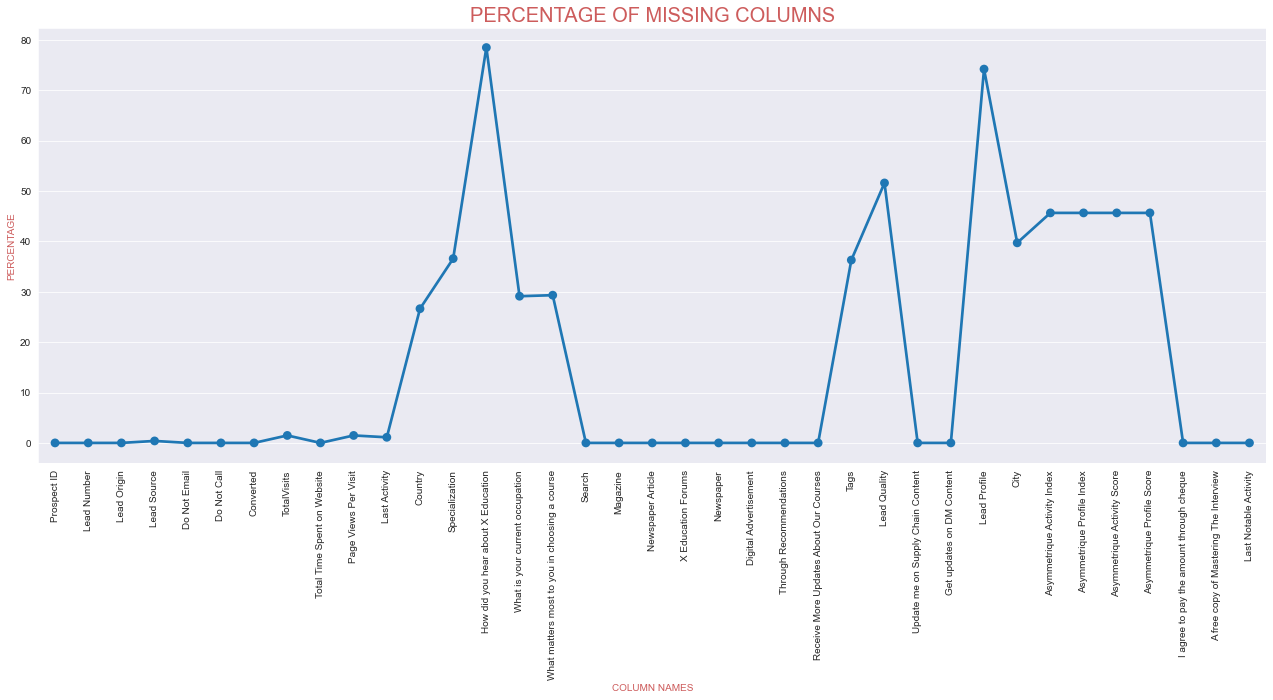

In [6]:
# Plotting percentage of missing data
sns.set_style('darkgrid')

fig = plt.figure(figsize=(22,8))
missing_data = pd.DataFrame((lead.isnull().sum()/len(lead))*100).reset_index()
ax  = sns.pointplot("index",0,data = missing_data)

plt.xticks(rotation = 90)
plt.xlabel('COLUMN NAMES', fontdict = {'color':'indianred','fontsize':10})
plt.ylabel('PERCENTAGE',  fontdict = {'color':'indianred','fontsize':10})
plt.title("PERCENTAGE OF MISSING COLUMNS",  fontdict = {'color':'indianred','fontsize':20});

#### Comment:

We will proceed with dropping columns with more than 30% missing values

In [7]:
# Also dropping prospect id,Last Notable Activity(column provided by the sales team)
subset = lead.columns.difference([ 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score','Prospect ID','Last Notable Activity'])
lead_filter = lead[subset]
lead_filter.head()

,A free copy of Mastering The Interview,Converted,Country,Digital Advertisement,Do Not Call,Do Not Email,Get updates on DM Content,I agree to pay the amount through cheque,Last Activity,Lead Number,Lead Origin,Lead Source,Magazine,Newspaper,Newspaper Article,Page Views Per Visit,Receive More Updates About Our Courses,Search,Specialization,Through Recommendations,Total Time Spent on Website,TotalVisits,Update me on Supply Chain Content,What is your current occupation,What matters most to you in choosing a course,X Education Forums
0,No,0,NaN,No,No,No,No,No,Page Visited on Website,660737,API,Olark Chat,No,No,No,0.0,No,No,NaN,No,0,0.0,No,Unemployed,Better Career Prospects,No
1,No,0,India,No,No,No,No,No,Email Opened,660728,API,Organic Search,No,No,No,2.5,No,No,NaN,No,674,5.0,No,Unemployed,Better Career Prospects,No
2,Yes,1,India,No,No,No,No,No,Email Opened,660727,Landing Page Submission,Direct Traffic,No,No,No,2.0,No,No,Business Administration,No,1532,2.0,No,Student,Better Career Prospects,No
3,No,0,India,No,No,No,No,No,Unreachable,660719,Landing Page Submission,Direct Traffic,No,No,No,1.0,No,No,Media and Advertising,No,305,1.0,No,Unemployed,Better Career Prospects,No
4,No,1,India,No,No,No,No,No,Converted to Lead,660681,Landing Page Submission,Google,No,No,No,1.0,No,No,NaN,No,1428,2.0,No,Unemployed,Better Career Prospects,No


In [8]:
# Checking nulls again and handling them column wise
round((lead_filter.isna().sum()/len(lead_filter))*100,2)

A free copy of Mastering The Interview            0.00
Converted                                         0.00
Country                                          26.63
Digital Advertisement                             0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
Last Activity                                     1.11
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Magazine                                          0.00
Newspaper                                         0.00
Newspaper Article                                 0.00
Page Views Per Visit                              1.48
Receive More Updates About Our Courses            0.00
Search                                            0.00
Specializa

###### Comment:
<font color= green> There are four columns having huge chunk of null values, these are important columns and if we remove the null values then it'll impace the dataset hence labeling the null values for these columns. </font>

In [9]:
# Replacing Null values with 'not provided'
lead_filter['Specialization'] = lead_filter['Specialization'].fillna('not provided') 
lead_filter['What matters most to you in choosing a course'] = lead_filter['What matters most to you in choosing a course'].fillna('not provided')
lead_filter['Country'] = lead_filter['Country'].fillna('not provided')
lead_filter['What is your current occupation'] = lead_filter['What is your current occupation'].fillna('not provided')

###### Comment:

The null values in the above mentioned columns have not been entered by the client. Hence replacing null with 'Not provided'

In [10]:
lead_filter.head()

,A free copy of Mastering The Interview,Converted,Country,Digital Advertisement,Do Not Call,Do Not Email,Get updates on DM Content,I agree to pay the amount through cheque,Last Activity,Lead Number,Lead Origin,Lead Source,Magazine,Newspaper,Newspaper Article,Page Views Per Visit,Receive More Updates About Our Courses,Search,Specialization,Through Recommendations,Total Time Spent on Website,TotalVisits,Update me on Supply Chain Content,What is your current occupation,What matters most to you in choosing a course,X Education Forums
0,No,0,not provided,No,No,No,No,No,Page Visited on Website,660737,API,Olark Chat,No,No,No,0.0,No,No,not provided,No,0,0.0,No,Unemployed,Better Career Prospects,No
1,No,0,India,No,No,No,No,No,Email Opened,660728,API,Organic Search,No,No,No,2.5,No,No,not provided,No,674,5.0,No,Unemployed,Better Career Prospects,No
2,Yes,1,India,No,No,No,No,No,Email Opened,660727,Landing Page Submission,Direct Traffic,No,No,No,2.0,No,No,Business Administration,No,1532,2.0,No,Student,Better Career Prospects,No
3,No,0,India,No,No,No,No,No,Unreachable,660719,Landing Page Submission,Direct Traffic,No,No,No,1.0,No,No,Media and Advertising,No,305,1.0,No,Unemployed,Better Career Prospects,No
4,No,1,India,No,No,No,No,No,Converted to Lead,660681,Landing Page Submission,Google,No,No,No,1.0,No,No,not provided,No,1428,2.0,No,Unemployed,Better Career Prospects,No


In [11]:
# Renaming Categorical columns to keep the names short and readable
lead_filter.rename(columns={"What is your current occupation":"Current Occupation","What matters most to you in choosing a course":"Priority",
                            "Update me on Supply Chain Content":"Update on Supply Chain","I agree to pay the amount through cheque":"Pay Cheque Confirmation",
                            "Get updates on DM Content":"DM Conent Updation","A free copy of Mastering The Interview":"Copy Mastering Interview"}, inplace=True)

In [12]:
# Checking nulls again and handling them column wise
round((lead_filter.isna().sum()/len(lead_filter))*100,2)

Copy Mastering Interview                  0.00
Converted                                 0.00
Country                                   0.00
Digital Advertisement                     0.00
Do Not Call                               0.00
Do Not Email                              0.00
DM Conent Updation                        0.00
Pay Cheque Confirmation                   0.00
Last Activity                             1.11
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Magazine                                  0.00
Newspaper                                 0.00
Newspaper Article                         0.00
Page Views Per Visit                      1.48
Receive More Updates About Our Courses    0.00
Search                                    0.00
Specialization                            0.00
Through Recommendations                   0.00
Total Time Spent on Website               0.00
TotalVisits  

###### Missing value imputation

In [13]:
# Handling other missing values
lead_filter['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [14]:
# Not able to determine what the last activty can be, hence replacing null values as "Not Sure"
lead_filter['Last Activity'] = lead_filter['Last Activity'].replace(np.nan, 'Not Sure')

In [15]:
lead_filter['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Sure                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [16]:
#  Binning the activities which has count less than 10 in others category
lead_filter['Last Activity']=lead_filter['Last Activity'].apply(lambda x: 'Others' if x in ('Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow') else x)

In [17]:
lead_filter['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Not Sure                      103
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

#### Missing value imputation with mean/median

In [18]:
lead_filter['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

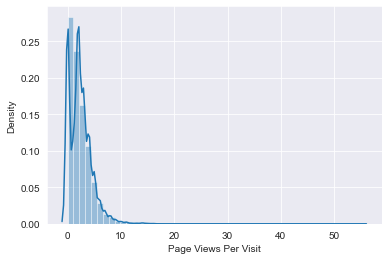

In [19]:
sns.distplot(lead['Page Views Per Visit']);

###### Comment:

Since this is numerical variable that is left skewed , we fill nan with Median of this field

In [20]:
print(lead_filter['Page Views Per Visit'].mean())
print(lead_filter['Page Views Per Visit'].median())

2.3628199494672093
2.0


In [21]:
lead_filter['Page Views Per Visit'] = lead_filter['Page Views Per Visit'].replace(np.nan, lead_filter['Page Views Per Visit'].median())


In [22]:
lead_filter['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [23]:
print(lead_filter['TotalVisits'].mean())
print(lead_filter['TotalVisits'].median())

3.445237833681204
3.0


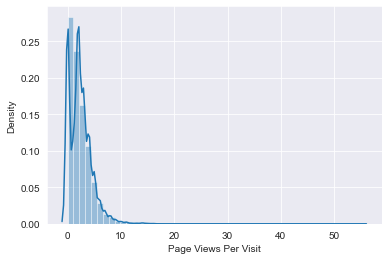

In [24]:
sns.distplot(lead['Page Views Per Visit']);

###### Comment:

Since this is numerical variable that is left skewed , we fill nan with Median of this field

In [25]:
lead_filter['TotalVisits'] = lead_filter['TotalVisits'].replace(np.nan, lead_filter['TotalVisits'].median())

In [26]:
lead_filter['Lead Source'].value_counts

<bound method IndexOpsMixin.value_counts of 0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object>

In [27]:
# Replacing null values with mode of this column
lead_filter['Lead Source'] = lead_filter['Lead Source'].replace(np.nan, lead_filter['Lead Source'].mode()[0])

In [28]:
# Checking nulls again
round((lead_filter.isna().sum()/len(lead_filter))*100,2)

Copy Mastering Interview                  0.0
Converted                                 0.0
Country                                   0.0
Digital Advertisement                     0.0
Do Not Call                               0.0
Do Not Email                              0.0
DM Conent Updation                        0.0
Pay Cheque Confirmation                   0.0
Last Activity                             0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Magazine                                  0.0
Newspaper                                 0.0
Newspaper Article                         0.0
Page Views Per Visit                      0.0
Receive More Updates About Our Courses    0.0
Search                                    0.0
Specialization                            0.0
Through Recommendations                   0.0
Total Time Spent on Website               0.0
TotalVisits                       

##### Comment:

All the null values have been handled.

## Step 3:- Outlier treatment and column wise analysis

#### Checking value counts of all the categorical columns


In [29]:
# Country
lead_filter.Country.value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Canada                     4
Kuwait                     4
Nigeria                    4
Sweden                     3
Ghana                      2
Philippines                2
Uganda                     2
China                      2
Bangladesh                 2
Italy                      2
Asia/Pacific Region        2
Belgium                    2
Netherlands                2
Tanzania                   1
Sri Lanka                  1
Russia                     1
Indonesia                  1
Malaysia                   1
Liberia       

In [30]:
# Binning the countries India, Not provided and Outside india
lead_filter.Country = lead_filter.Country.apply(lambda x: 'India' if x=='India' else ('Not Provided' if x=='not provided' else 'Outside India' )) 

In [31]:
lead_filter.Country.value_counts()

India            6492
Not Provided     2461
Outside India     287
Name: Country, dtype: int64

In [32]:
#'Digital Advertisement'
lead_filter["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [33]:
# only 4 values are there of type 'Yes' in Digital Advertisement, so it's highly skewed and it's better to drop this column
lead_filter.drop(columns='Digital Advertisement', inplace=True)

In [34]:
# Do Not Call
lead_filter['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [35]:
# highly skewed column better to drop
lead_filter.drop(columns='Do Not Call', inplace=True)

In [36]:
# Do Not Email
lead_filter['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [37]:
# DM Conent Updation
lead_filter['DM Conent Updation'].value_counts()

No    9240
Name: DM Conent Updation, dtype: int64

In [38]:
# DM Conent Updation has only single value so it's better to drop as it will not make any impact in prediction
lead_filter.drop(columns='DM Conent Updation', inplace=True)

In [39]:
# Pay Cheque Confirmation
lead_filter['Pay Cheque Confirmation'].value_counts()

No    9240
Name: Pay Cheque Confirmation, dtype: int64

In [40]:
# Pay Cheque Confirmation has only single value so it's better to drop as it will not make any impact in prediction
lead_filter.drop(columns='Pay Cheque Confirmation', inplace=True)

In [41]:
# Last Activity 
lead_filter['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Not Sure                      103
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [42]:
# Magazine
lead_filter['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [43]:
# Magazine has only single value so it's better to drop as it will not make any impact in prediction
lead_filter.drop(columns='Magazine', inplace=True)

In [44]:
# Newspaper
lead_filter.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [45]:
# Only single yes, so dropping the newspaper column as it will not make any impact in prediction
lead_filter.drop(columns='Newspaper', inplace=True)

In [46]:
# Newspaper Article
lead_filter['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [47]:
# Only single yes, so dropping the Newspaper Article column as it will not make any impact in prediction
lead_filter.drop(columns='Newspaper Article', inplace=True)

In [48]:
# Receive More Updates About Our Course
lead_filter['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [49]:
# Receive More Updates About Our Courses has only single value so it's better to drop as it will not make any impact in prediction
lead_filter.drop(columns='Receive More Updates About Our Courses', inplace=True)

In [50]:
# X Education Forums
lead_filter['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [51]:
# X Education Forums has only single value so it's better to drop as it will not make any impact in prediction
lead_filter.drop(columns='X Education Forums', inplace=True)

In [52]:
# Through Recommendations
lead_filter['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [53]:
# only 7 records having yes out of 9257 so very negligible , we can drop this column
lead_filter.drop(columns='Through Recommendations', inplace=True)

In [54]:
# Update on Supply Chain
lead_filter['Update on Supply Chain'].value_counts()

No    9240
Name: Update on Supply Chain, dtype: int64

In [55]:
# Update on Supply Chain has only single value so it's better to drop as it will not make any impact in prediction
lead_filter.drop(columns='Update on Supply Chain', inplace=True)

In [56]:
# Search
lead_filter.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [57]:
# only 14 records having yes out of 9226 so very negligible , we can drop this column
lead_filter.drop(columns='Search', inplace=True)

In [58]:
# Checking lead source
lead_filter['Lead Source'].value_counts()


Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
blog                    1
testone                 1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [59]:
# Changing 'google' to Google
# Binning the variables having count less than 10 into others category
lead_filter['Lead Source'] = lead_filter['Lead Source'].replace({'google':'Google'})
lead_filter['Lead Source'] =lead_filter['Lead Source'].apply(lambda x: 'Others' if x in ('bing','Click2call','Social Media','Live Chat','Press_Release','WeLearn','blog','welearnblog_Home','testone','Pay per Click Ads','NC_EDM','youtubechannel') else x)

In [60]:
lead_filter['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

#### Outlier Treatment

In [61]:
lead_filter.head()

,Copy Mastering Interview,Converted,Country,Do Not Email,Last Activity,Lead Number,Lead Origin,Lead Source,Page Views Per Visit,Specialization,Total Time Spent on Website,TotalVisits,Current Occupation,Priority
0,No,0,Not Provided,No,Page Visited on Website,660737,API,Olark Chat,0.0,not provided,0,0.0,Unemployed,Better Career Prospects
1,No,0,India,No,Email Opened,660728,API,Organic Search,2.5,not provided,674,5.0,Unemployed,Better Career Prospects
2,Yes,1,India,No,Email Opened,660727,Landing Page Submission,Direct Traffic,2.0,Business Administration,1532,2.0,Student,Better Career Prospects
3,No,0,India,No,Unreachable,660719,Landing Page Submission,Direct Traffic,1.0,Media and Advertising,305,1.0,Unemployed,Better Career Prospects
4,No,1,India,No,Converted to Lead,660681,Landing Page Submission,Google,1.0,not provided,1428,2.0,Unemployed,Better Career Prospects


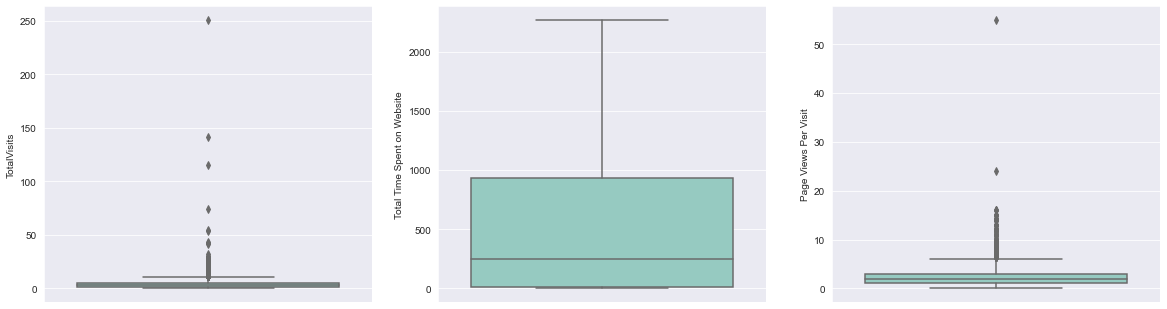

In [62]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data =lead_filter )
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = lead_filter)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead_filter)
plt.show()

##### Comment:

**Total Visits** and **Page Views Per Visit** have the outliers where as Total time spent on website does not have any outlier.

In [63]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead_filter.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,Lead Number,Page Views Per Visit,Total Time Spent on Website,TotalVisits
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,617188.435606,2.357440,487.698268,3.438636
std,0.486714,23405.995698,2.145781,548.021466,4.819024
min,0.000000,579533.000000,0.000000,0.000000,0.000000
25%,0.000000,596484.500000,1.000000,12.000000,1.000000
50%,0.000000,615479.000000,2.000000,248.000000,3.000000
75%,1.000000,637387.250000,3.000000,936.000000,5.000000
90%,1.000000,650506.100000,5.000000,1380.000000,7.000000
95%,1.000000,655404.050000,6.000000,1562.000000,10.000000
99%,1.000000,659592.980000,9.000000,1840.610000,17.000000


In [64]:
#outlier treatment for total visits
print(lead_filter['TotalVisits'].describe())

#removing records beyond 99 percentile
lead_filter = lead_filter[lead_filter.TotalVisits <= 17]


count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


In [65]:
#checking the description
lead_filter.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,Lead Number,Page Views Per Visit,Total Time Spent on Website,TotalVisits
count,9157.000000,9157.000000,9157.000000,9157.000000,9157.000000
mean,0.384951,617229.666921,2.332225,486.189036,3.203888
std,0.486610,23420.299927,2.047285,547.695908,2.967759
min,0.000000,579533.000000,0.000000,0.000000,0.000000
25%,0.000000,596507.000000,1.000000,10.000000,1.000000
50%,0.000000,615558.000000,2.000000,247.000000,3.000000
75%,1.000000,637414.000000,3.000000,933.000000,5.000000
90%,1.000000,650522.000000,5.000000,1379.000000,7.000000
95%,1.000000,655423.800000,6.000000,1559.400000,9.000000
99%,1.000000,659603.080000,9.000000,1839.440000,13.000000


In [66]:
#outlier treatment for Page Views Per Visit
print(lead_filter['Page Views Per Visit'].describe())

#removing records beyond 99 percentile
lead_filter = lead_filter[lead_filter['Page Views Per Visit'] <= 16]

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64


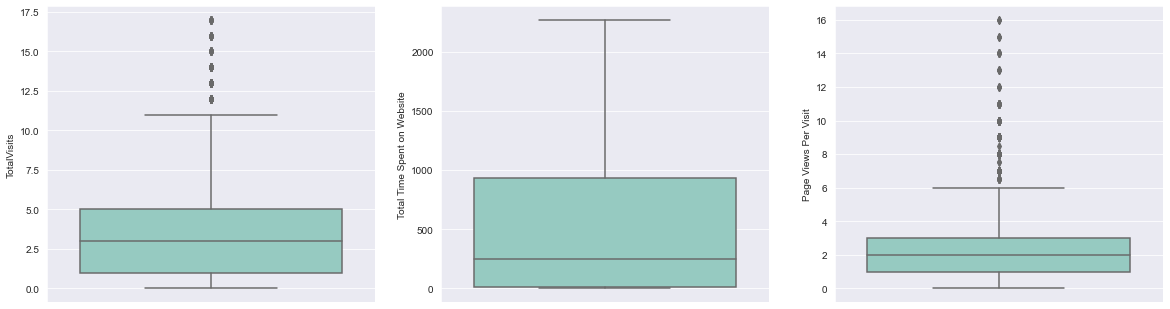

In [67]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data =lead_filter )
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = lead_filter)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead_filter)
plt.show()

In [68]:
# Determine the percentage of data retained

num_data = round(100*(len(lead_filter)/9240),2)
print(num_data)

99.1


## Step 4:- Univariate and Bivariate Analysis

In [69]:
lead_filter.head()

,Copy Mastering Interview,Converted,Country,Do Not Email,Last Activity,Lead Number,Lead Origin,Lead Source,Page Views Per Visit,Specialization,Total Time Spent on Website,TotalVisits,Current Occupation,Priority
0,No,0,Not Provided,No,Page Visited on Website,660737,API,Olark Chat,0.0,not provided,0,0.0,Unemployed,Better Career Prospects
1,No,0,India,No,Email Opened,660728,API,Organic Search,2.5,not provided,674,5.0,Unemployed,Better Career Prospects
2,Yes,1,India,No,Email Opened,660727,Landing Page Submission,Direct Traffic,2.0,Business Administration,1532,2.0,Student,Better Career Prospects
3,No,0,India,No,Unreachable,660719,Landing Page Submission,Direct Traffic,1.0,Media and Advertising,305,1.0,Unemployed,Better Career Prospects
4,No,1,India,No,Converted to Lead,660681,Landing Page Submission,Google,1.0,not provided,1428,2.0,Unemployed,Better Career Prospects


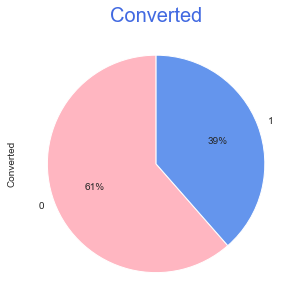

In [70]:
plt.figure(figsize = (10,5))
splot = lead['Converted'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%', colors = ['lightpink', 'cornflowerblue'], startangle = 90)
plt.title("Converted", fontdict = {'color' :'royalblue', 'fontsize':20} )

plt.show()

##### Comment:

- 30% of the leads were converted as HOT leads where as 61% were not

<Figure size 1440x1080 with 0 Axes>

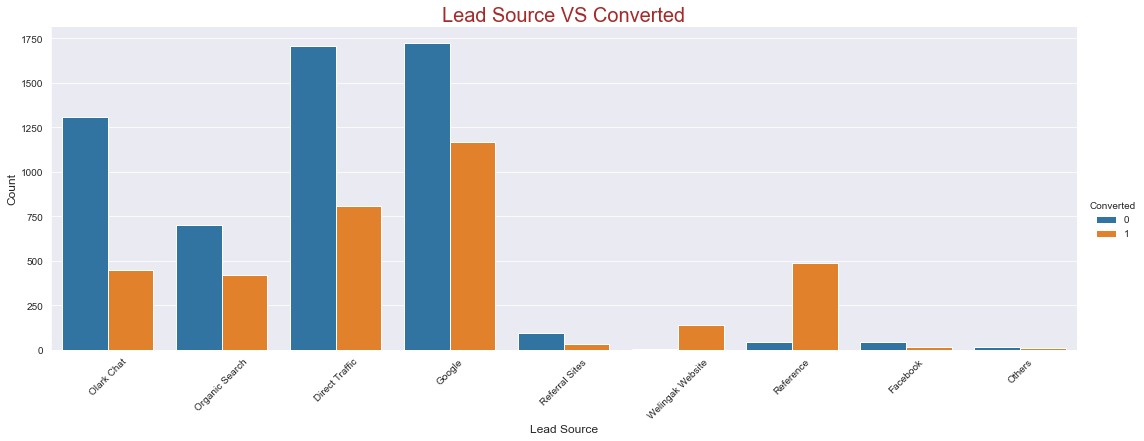

In [71]:
# plotting lead origin with converted

plt.figure(figsize=(20,15))
plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_filter, aspect=3);
plt.title("Lead Source VS Converted", fontsize = 20, color = 'brown')
plt.xlabel("Lead Source", fontsize = 12)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize = 12)
plt.show()

#### Comment:

The percentage of conversion rate is higher in cases of **reference and welingak website**.

<Figure size 1080x720 with 0 Axes>

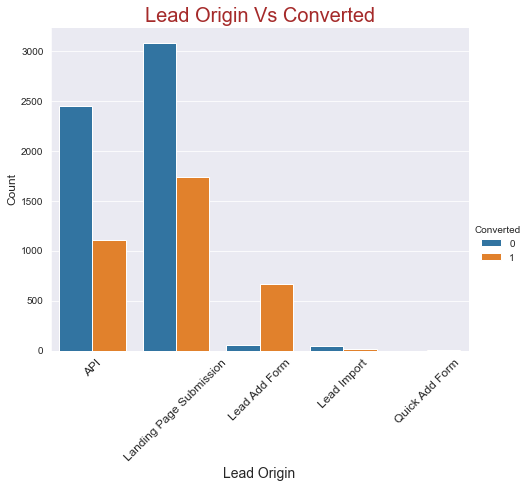

In [72]:
#plotting lead source with converted 
plt.figure(figsize=(15,10))
plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_filter, aspect=1.3);
plt.title('Lead Origin Vs Converted', fontsize = 20, color = 'brown')
plt.xlabel("Lead Origin", fontsize = 14)
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

##### Comment:

**Lead add form** has execptionally higher lead conversion rate.

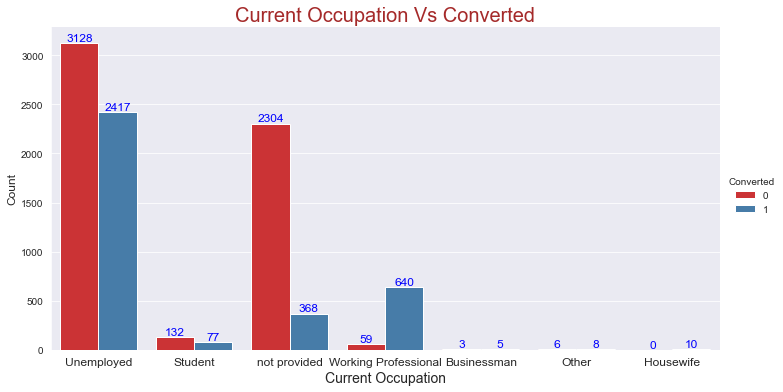

In [73]:
# plotting Current Occupation with converted 

plot = sns.catplot(x="Current Occupation", hue = "Converted", kind="count", data=lead_filter, palette="Set1", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 20, color = 'brown')
plt.xlabel("Current Occupation", fontsize = 14)
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

###### Comment:

From the above graph we can infer that, the unemployed people are the major lead source but the conversion rate is higher among **working professionals and business man**. Also, surprisingly the conversion rate is 100% for the house wives.

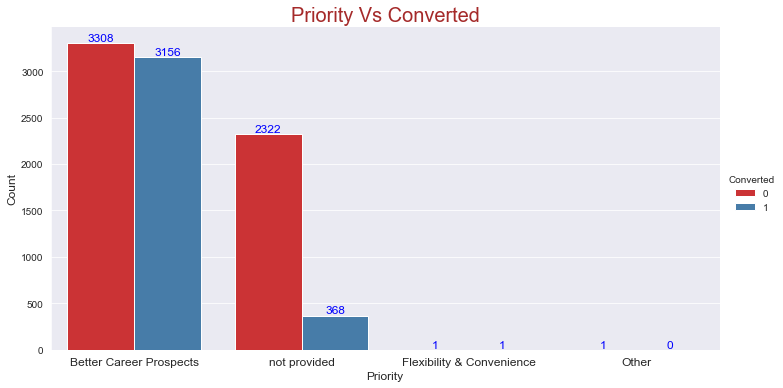

In [74]:
# plotting Priority with converted 

plot = sns.catplot(x="Priority", hue = "Converted", kind="count", data=lead_filter, palette="Set1", 
                   aspect = 2.0);

plt.title('Priority Vs Converted', fontsize = 20, color = 'brown')
plt.xlabel("Priority", fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

###### Comment:

We can infer that clients choose courses to have **Better Career Prospects**

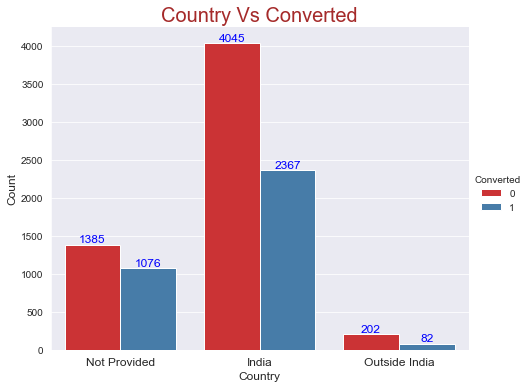

In [75]:
# plotting country with converted 

plot = sns.catplot(x="Country", hue = "Converted", kind="count", data=lead_filter, palette="Set1", 
                   aspect = 1.3);

plt.title('Country Vs Converted', fontsize = 20, color = 'brown')
plt.xlabel("Country", fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

##### Comment:

The conversion rate in the clients who have not specified the country is higher

<Figure size 1440x1080 with 0 Axes>

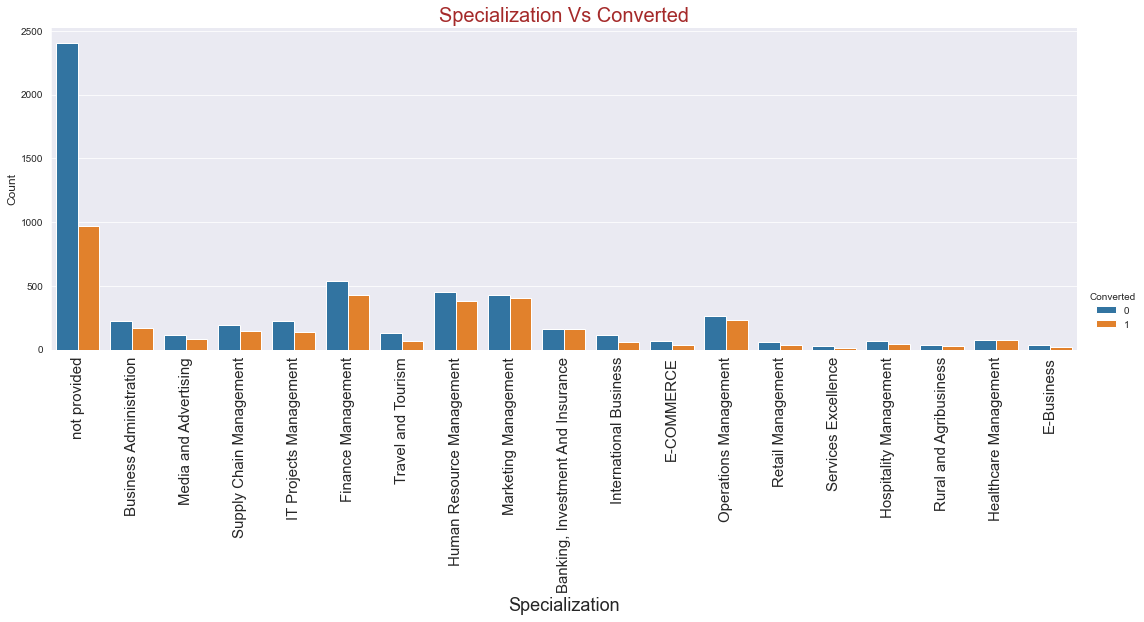

In [76]:
# plotting Specialization with converted
plt.figure(figsize=(20,15))
plot = sns.catplot(x="Specialization", hue = "Converted", kind="count", data=lead_filter, aspect=3);
plt.title('Specialization Vs Converted', fontsize = 20, color = 'brown')
plt.xlabel("Specialization", fontsize = 18)
plt.xticks(fontsize = 15)
plt.xticks(rotation=90)
plt.ylabel("Count", fontsize = 12)
plt.show()

##### Comment:

From the graph, it can be inferred that Finance Management, Human Resource Management, Marketing Management and Operations Management have better conversion rate. 

<Figure size 1440x1080 with 0 Axes>

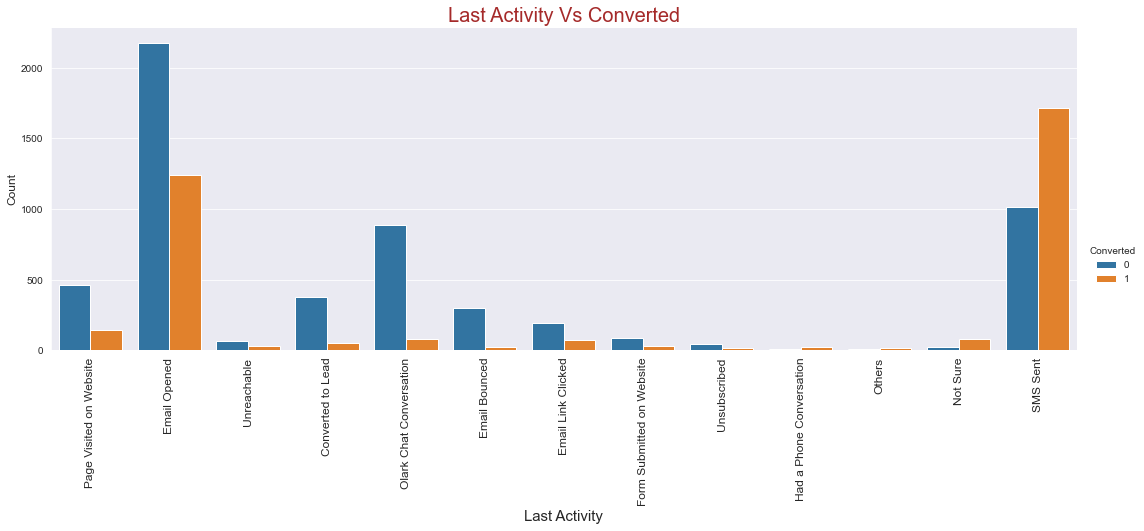

In [77]:
# plotting Last Activity with converted
plt.figure(figsize=(20,15))
plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_filter, aspect=3);
plt.title('Last Activity Vs Converted', fontsize = 20, color = 'brown')
plt.xlabel("Last Activity", fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

##### Comment:

**SMS Sent** has the higher conversion rate than any other activities

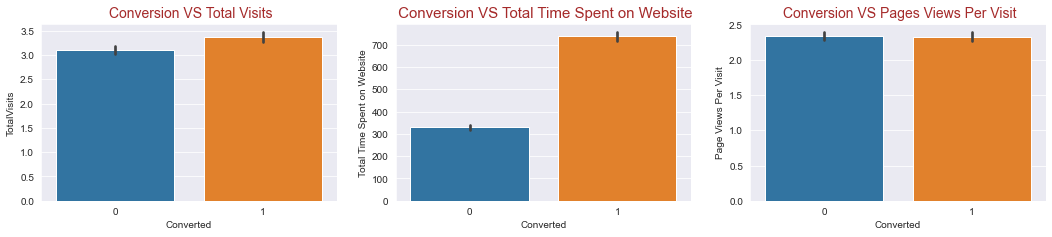

In [78]:
# Now check the conversions for all numeric values

plt.figure(figsize=(18,15))

plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted',  data = lead_filter)
plt.title(" Conversion VS Total Visits", fontsize = 14, color = 'brown')

plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted',  data = lead_filter)
plt.title(" Conversion VS Total Time Spent on Website",fontsize = 15, color = 'brown')

plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted',  data = lead_filter)
plt.title(" Conversion VS Pages Views Per Visit",fontsize = 14, color = 'brown')

plt.show()

##### Comment:

The conversion rates are high for **Total Visits, Total Time Spent on Website** and **Page Views Per Visit**

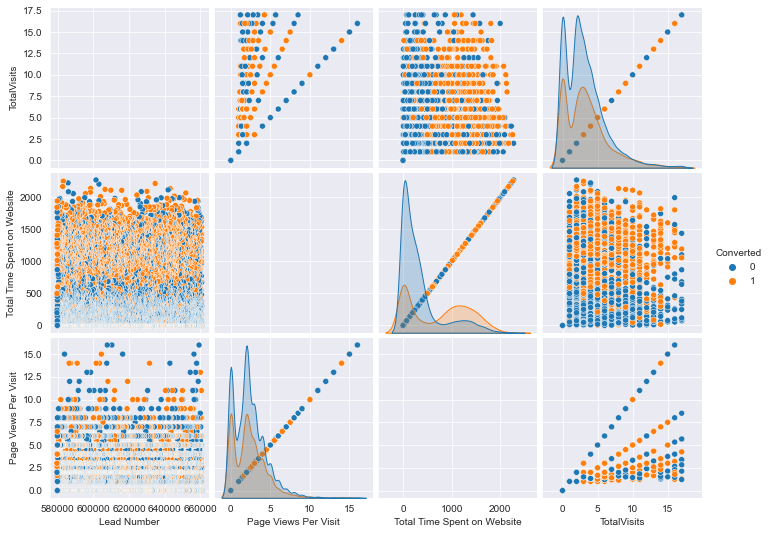

In [79]:
sns.pairplot(data = lead_filter, hue ='Converted', y_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

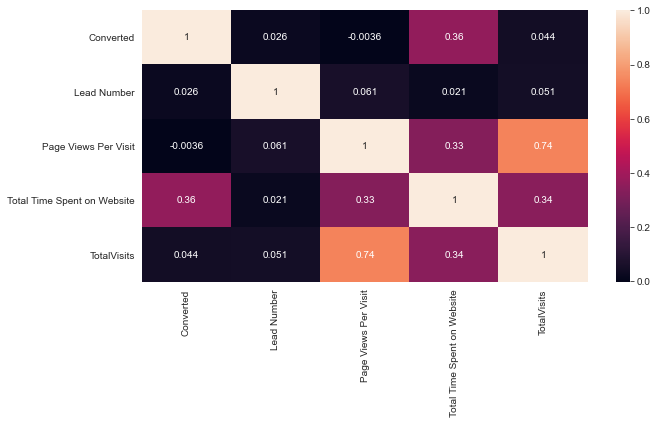

In [80]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_filter.corr(), annot=True)
plt.show()

###### Observation:

**Total Visits** column is highly correlated with **Page Views Per Visit**

## Step 5:- Data Preparation - Creating Dummies

In [81]:
lead_filter.head()

,Copy Mastering Interview,Converted,Country,Do Not Email,Last Activity,Lead Number,Lead Origin,Lead Source,Page Views Per Visit,Specialization,Total Time Spent on Website,TotalVisits,Current Occupation,Priority
0,No,0,Not Provided,No,Page Visited on Website,660737,API,Olark Chat,0.0,not provided,0,0.0,Unemployed,Better Career Prospects
1,No,0,India,No,Email Opened,660728,API,Organic Search,2.5,not provided,674,5.0,Unemployed,Better Career Prospects
2,Yes,1,India,No,Email Opened,660727,Landing Page Submission,Direct Traffic,2.0,Business Administration,1532,2.0,Student,Better Career Prospects
3,No,0,India,No,Unreachable,660719,Landing Page Submission,Direct Traffic,1.0,Media and Advertising,305,1.0,Unemployed,Better Career Prospects
4,No,1,India,No,Converted to Lead,660681,Landing Page Submission,Google,1.0,not provided,1428,2.0,Unemployed,Better Career Prospects


In [82]:
# Creating dummies for the binary valued categorical columns
bin_cat_col=['Copy Mastering Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
lead_filter[bin_cat_col] = lead_filter[bin_cat_col].apply(binary_map)

In [83]:
# Creating dummies for other categorical variables
country_dummy = pd.get_dummies(lead_filter['Country'],drop_first=True,prefix='Country')
Last_Activity_dummy = pd.get_dummies(lead_filter['Last Activity'],drop_first=True,prefix='LastAct')
Lead_Origin_dummy = pd.get_dummies(lead_filter['Lead Origin'],drop_first=True,prefix='LeadOrigin')
Lead_Source_dummy = pd.get_dummies(lead_filter['Lead Source'],drop_first=True,prefix='LeadSource')
Specialization_dummy = pd.get_dummies(lead_filter['Specialization'],drop_first=True,prefix='Spec')
Current_Occupation_dummy = pd.get_dummies(lead_filter['Current Occupation'],drop_first=True,prefix='Occupation')
Priority_dummy = pd.get_dummies(lead_filter['Priority'],drop_first=True,prefix='Priority')

In [84]:
# Concatenating the dummy variables with the parent dataframe
lead_filter= pd.concat([lead_filter,country_dummy,Last_Activity_dummy,Lead_Origin_dummy,
                        Lead_Source_dummy,Specialization_dummy,Current_Occupation_dummy,Priority_dummy],axis=1)

In [85]:
lead_filter.head()

,Copy Mastering Interview,Converted,Country,Do Not Email,Last Activity,Lead Number,Lead Origin,Lead Source,Page Views Per Visit,Specialization,Total Time Spent on Website,TotalVisits,Current Occupation,Priority,Country_Not Provided,Country_Outside India,LastAct_Email Bounced,LastAct_Email Link Clicked,LastAct_Email Opened,LastAct_Form Submitted on Website,LastAct_Had a Phone Conversation,LastAct_Not Sure,LastAct_Olark Chat Conversation,LastAct_Others,LastAct_Page Visited on Website,LastAct_SMS Sent,LastAct_Unreachable,LastAct_Unsubscribed,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Spec_Business Administration,Spec_E-Business,Spec_E-COMMERCE,Spec_Finance Management,Spec_Healthcare Management,Spec_Hospitality Management,Spec_Human Resource Management,Spec_IT Projects Management,Spec_International Business,Spec_Marketing Management,Spec_Media and Advertising,Spec_Operations Management,Spec_Retail Management,Spec_Rural and Agribusiness,Spec_Services Excellence,Spec_Supply Chain Management,Spec_Travel and Tourism,Spec_not provided,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Occupation_not provided,Priority_Flexibility & Convenience,Priority_Other,Priority_not provided
0,0,0,Not Provided,0,Page Visited on Website,660737,API,Olark Chat,0.0,not provided,0,0.0,Unemployed,Better Career Prospects,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,India,0,Email Opened,660728,API,Organic Search,2.5,not provided,674,5.0,Unemployed,Better Career Prospects,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1,1,India,0,Email Opened,660727,Landing Page Submission,Direct Traffic,2.0,Business Administration,1532,2.0,Student,Better Career Prospects,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,India,0,Unreachable,660719,Landing Page Submission,Direct Traffic,1.0,Media and Advertising,305,1.0,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,India,0,Converted to Lead,660681,Landing Page Submission,Google,1.0,not provided,1428,2.0,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


##### Dropping the following columns
- Copy Mastering Interview, Country, Do Not Email, Last Activity, Lead Origin, Lead Source, Specialization, Current Occupation, Priority, Lead Number
- "not provided" data

In [86]:
lead_filter = lead_filter.drop(['Copy Mastering Interview','Country','Do Not Email','Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'Current Occupation', 'Specialization','Priority','Country_Not Provided','Country_Outside India','Occupation_not provided','Priority_not provided'], axis=1)

In [87]:
lead_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Converted                           9157 non-null   int64  
 1   Page Views Per Visit                9157 non-null   float64
 2   Total Time Spent on Website         9157 non-null   int64  
 3   TotalVisits                         9157 non-null   float64
 4   LastAct_Email Bounced               9157 non-null   uint8  
 5   LastAct_Email Link Clicked          9157 non-null   uint8  
 6   LastAct_Email Opened                9157 non-null   uint8  
 7   LastAct_Form Submitted on Website   9157 non-null   uint8  
 8   LastAct_Had a Phone Conversation    9157 non-null   uint8  
 9   LastAct_Not Sure                    9157 non-null   uint8  
 10  LastAct_Olark Chat Conversation     9157 non-null   uint8  
 11  LastAct_Others                      9157 no

There are no missing value and we can go forward for train test split

## Step 6:- Train Test Split

In [88]:
X = lead_filter.drop(['Converted'], axis =1)
y = lead_filter['Converted']

# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 7: Rescaling Features

In [89]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [90]:
X_train.head()

,Page Views Per Visit,Total Time Spent on Website,TotalVisits,LastAct_Email Bounced,LastAct_Email Link Clicked,LastAct_Email Opened,LastAct_Form Submitted on Website,LastAct_Had a Phone Conversation,LastAct_Not Sure,LastAct_Olark Chat Conversation,LastAct_Others,LastAct_Page Visited on Website,LastAct_SMS Sent,LastAct_Unreachable,LastAct_Unsubscribed,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Others,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Spec_Business Administration,Spec_E-Business,Spec_E-COMMERCE,Spec_Finance Management,Spec_Healthcare Management,Spec_Hospitality Management,Spec_Human Resource Management,Spec_IT Projects Management,Spec_International Business,Spec_Marketing Management,Spec_Media and Advertising,Spec_Operations Management,Spec_Retail Management,Spec_Rural and Agribusiness,Spec_Services Excellence,Spec_Supply Chain Management,Spec_Travel and Tourism,Spec_not provided,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Priority_Flexibility & Convenience,Priority_Other
6490,0.06250,0.014376,0.058824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4026,0.09375,0.076370,0.176471,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6453,0.37500,0.185984,0.705882,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8949,0.09375,0.072327,0.352941,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6467,0.68750,0.030099,0.647059,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Step 8:- Model Building

##### Using stats model for model building and later use RFE for feature selection


#### Initial Training model

In [91]:
# Logistic regression model
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.5
Date:                Sun, 16 May 2021   Deviance:                       5087.0
Time:                        17:21:03   Pearson chi2:                 7.97e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.7749      0.339    -11.140      0.000      -4.439      -3.111
Page Views Per Visit                  -1.8821      0.443     -4.252      0.000      -2.750      -1.014
Total Time Spent on Website            4.5906      0.170     26.964      0.000       4.257       4.924
TotalVisits                            1.5992      0.311      5.143      0.000       0.990       2.209
LastAct_Email Bounced                 -0.5971      0.382     -1.563      0.118      -1.346       0.152
LastAct_Email Link Clicked             0.8406      0.309      2.725      0.006       0.236       1.445
LastAct_Email Opened                   1.3057      0.232      5.634      0.000       0.851       1.760
LastAct_Form Submitted on Website      0.1190      0.428      0.278      0.781      -0.720       0.958
LastAct_Had a Phone Conversation       2.6053      0.682      3.818      0.000       1.268       3.943
LastAct_Not Sure                      -0.1616      0.554     -0.292      0.770      -1.247       0.923
LastAct_Olark Chat Conversation       -0.2732      0.283     -0.964      0.335      -0.828       0.282
LastAct_Others                         1.8923      0.744      2.542      0.011       0.433       3.351
LastAct_Page Visited on Website        0.5880      0.273      2.151      0.031       0.052       1.124
LastAct_SMS Sent                       2.4208      0.233     10.396      0.000       1.964       2.877
LastAct_Unreachable                    1.2384      0.406      3.051      0.002       0.443       2.034
LastAct_Unsubscribed                   0.8177      0.490      1.667      0.095      -0.144       1.779
LeadOrigin_Landing Page Submission    -0.8208      0.142     -5.775      0.000      -1.099      -0.542
LeadOrigin_Lead Add Form               2.9871      0.586      5.096      0.000       1.838       4.136
LeadOrigin_Lead Import                21.7666   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LeadOrigin_Quick Add Form             20.6008   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
LeadSource_Facebook                  -21.2000   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
LeadSource_Google                      0.3991      0.098      4.082      0.000       0.207       0.591
LeadSource_Olark Chat                  1.6758      0.161     10.421      0.000       1.361       1.991
LeadSource_Organic Search              0.2340      0.132      1.773      0.076      -0.025       0.493
LeadSource_Others                      1.2100      0.710      1.704      0.088      -0.182       2.602
LeadSource_Reference                   0.4087      0.617      0.662      0.508      -0.801       1.618
LeadSource_Referral Sites             -0.0570      0.356     -0.160      0.873      -0.754      

#### Feature selection using RFE

In [92]:
logreg = LogisticRegression()

# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [93]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Page Views Per Visit', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('TotalVisits', True, 1),
 ('LastAct_Email Bounced', True, 1),
 ('LastAct_Email Link Clicked', False, 14),
 ('LastAct_Email Opened', False, 5),
 ('LastAct_Form Submitted on Website', False, 38),
 ('LastAct_Had a Phone Conversation', True, 1),
 ('LastAct_Not Sure', False, 11),
 ('LastAct_Olark Chat Conversation', True, 1),
 ('LastAct_Others', False, 4),
 ('LastAct_Page Visited on Website', False, 16),
 ('LastAct_SMS Sent', True, 1),
 ('LastAct_Unreachable', False, 7),
 ('LastAct_Unsubscribed', False, 15),
 ('LeadOrigin_Landing Page Submission', False, 2),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 17),
 ('LeadOrigin_Quick Add Form', False, 26),
 ('LeadSource_Facebook', False, 30),
 ('LeadSource_Google', False, 19),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 23),
 ('LeadSource_Others', False, 9),
 ('LeadSource_Reference', False, 18),
 ('LeadSourc

In [94]:
# columns sorted by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits',
       'LastAct_Email Bounced', 'LastAct_Had a Phone Conversation',
       'LastAct_Olark Chat Conversation', 'LastAct_SMS Sent',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'Occupation_Housewife',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Priority_Flexibility & Convenience'],
      dtype='object')

#### Model 2 using RFE features

In [95]:
X_train_sm = sm.add_constant(X_train[cols])
lm= sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.0
Date:                Sun, 16 May 2021   Deviance:                       5272.1
Time:                        17:21:05   Pearson chi2:                 8.05e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.6301      0.127    -28.579      0.000      -3.879      -3.381
Page Views Per Visit                  -1.4904      0.415     -3.595      0.000      -2.303      -0.678
Total Time Spent on Website            4.6132      0.165     27.893      0.000       4.289       4.937
TotalVisits                            1.6334      0.291      5.615      0.000       1.063       2.204
LastAct_Email Bounced                 -1.7892      0.307     -5.833      0.000      -2.390      -1.188
LastAct_Had a Phone Conversation       1.6793      0.631      2.659      0.008       0.442       2.917
LastAct_Olark Chat Conversation       -1.3764      0.169     -8.168      0.000      -1.707      -1.046
LastAct_SMS Sent                       1.2875      0.075     17.207      0.000       1.141       1.434
LeadOrigin_Lead Add Form               3.6523      0.212     17.245      0.000       3.237       4.067
LeadSource_Olark Chat                  1.7019      0.124     13.711      0.000       1.459       1.945
LeadSource_Welingak Website            1.9376      0.751      2.580      0.010       0.466       3.410
Occupation_Housewife                  23.3554   1.65e+04      0.001      0.999   -3.22e+04    3.23e+04
Occupation_Student                     1.2392      0.228      5.440      0.000       0.793       1.686
Occupation_Unemployed                  1.2889      0.087     14.790      0.000       1.118       1.460
Occupation_Working Professional        3.6967      0.194     19.055      0.000       3.316       4.077
Priority_Flexibility & Convenience   -26.9631   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
======================================================================================================
"""

In [96]:
# All evaluation metrics on the model 2
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Accuracy -", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Accuracy - 0.8163520049929787
Sensitivity -  0.704
Specificity -  0.887
False Positive Rate -  0.113
Positive Predicted Value -  0.797
Negative Predicted Value -  0.826


##### Comment:

Dropping **Priority_Flexibility & Convenience** as it has high P value. Hence it is insignificant

#### Model 3 

In [97]:
cols = cols.drop('Priority_Flexibility & Convenience',1)
X_train_sm = sm.add_constant(X_train[cols])
lm= sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.4
Date:                Sun, 16 May 2021   Deviance:                       5280.8
Time:                        17:21:05   Pearson chi2:                 7.99e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6262      0.127    -28.573      0.000      -3.875      -3.377
Page Views Per Visit                -1.4972      0.414     -3.613      0.000      -2.309      -0.685
Total Time Spent on Website          4.6098      0.165     27.893      0.000       4.286       4.934
TotalVisits                          1.6275      0.291      5.597      0.000       1.058       2.197
LastAct_Email Bounced               -1.7865      0.306     -5.836      0.000      -2.386      -1.187
LastAct_Had a Phone Conversation     1.6802      0.631      2.663      0.008       0.443       2.917
LastAct_Olark Chat Conversation     -1.3746      0.168     -8.165      0.000      -1.705      -1.045
LastAct_SMS Sent                     1.2884      0.075     17.233      0.000       1.142       1.435
LeadOrigin_Lead Add Form             3.6131      0.210     17.240      0.000       3.202       4.024
LeadSource_Olark Chat                1.6974      0.124     13.686      0.000       1.454       1.941
LeadSource_Welingak Website          1.9715      0.750      2.627      0.009       0.501       3.442
Occupation_Housewife                23.3618   1.65e+04      0.001      0.999   -3.23e+04    3.23e+04
Occupation_Student                   1.2412      0.228      5.453      0.000       0.795       1.687
Occupation_Unemployed                1.2900      0.087     14.805      0.000       1.119       1.461
Occupation_Working Professional      3.6673      0.192     19.053      0.000       3.290       4.045
====================================================================================================
"""

In [98]:
# All evaluation metrics on the model 3
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Accuracy -", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Accuracy - 0.8160399438289905
Sensitivity -  0.704
Specificity -  0.887
False Positive Rate -  0.113
Positive Predicted Value -  0.797
Negative Predicted Value -  0.826


##### Comment:

Dropping **Occupation_Housewife** as it has high P value. Hence it is insignificant

#### Model 4

In [99]:
cols = cols.drop('Occupation_Housewife',1)
X_train_sm = sm.add_constant(X_train[cols])
lm= sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.8
Date:                Sun, 16 May 2021   Deviance:                       5295.6
Time:                        17:21:05   Pearson chi2:                 8.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.5983      0.126    -28.518      0.000      -3.846      -3.351
Page Views Per Visit                -1.4899      0.414     -3.601      0.000      -2.301      -0.679
Total Time Spent on Website          4.6175      0.165     27.972      0.000       4.294       4.941
TotalVisits                          1.6150      0.290      5.561      0.000       1.046       2.184
LastAct_Email Bounced               -1.7959      0.306     -5.860      0.000      -2.397      -1.195
LastAct_Had a Phone Conversation     1.6726      0.631      2.651      0.008       0.436       2.909
LastAct_Olark Chat Conversation     -1.3812      0.168     -8.210      0.000      -1.711      -1.051
LastAct_SMS Sent                     1.2796      0.075     17.140      0.000       1.133       1.426
LeadOrigin_Lead Add Form             3.6533      0.210     17.430      0.000       3.243       4.064
LeadSource_Olark Chat                1.6908      0.124     13.656      0.000       1.448       1.934
LeadSource_Welingak Website          1.9318      0.751      2.574      0.010       0.461       3.403
Occupation_Student                   1.2142      0.228      5.336      0.000       0.768       1.660
Occupation_Unemployed                1.2647      0.086     14.634      0.000       1.095       1.434
Occupation_Working Professional      3.6409      0.192     18.948      0.000       3.264       4.018
====================================================================================================
"""

In [100]:
# All evaluation metrics on the model 4
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Accuracy -", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Accuracy - 0.8158839132469964
Sensitivity -  0.704
Specificity -  0.886
False Positive Rate -  0.114
Positive Predicted Value -  0.797
Negative Predicted Value -  0.826


##### Comment
Dropping **LeadSource_Welingak** Website as it has higher P value. Hence it is insignificant

#### Model- 5

In [101]:
cols = cols.drop('LeadSource_Welingak Website',1)
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.2
Date:                Sun, 16 May 2021   Deviance:                       5306.4
Time:                        17:21:05   Pearson chi2:                 8.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.5982      0.126    -28.510      0.000      -3.846      -3.351
Page Views Per Visit                -1.4927      0.414     -3.607      0.000      -2.304      -0.682
Total Time Spent on Website          4.6140      0.165     27.952      0.000       4.291       4.938
TotalVisits                          1.6126      0.290      5.555      0.000       1.044       2.182
LastAct_Email Bounced               -1.7764      0.305     -5.824      0.000      -2.374      -1.179
LastAct_Had a Phone Conversation     1.6654      0.633      2.633      0.008       0.426       2.905
LastAct_Olark Chat Conversation     -1.3735      0.168     -8.191      0.000      -1.702      -1.045
LastAct_SMS Sent                     1.2800      0.075     17.153      0.000       1.134       1.426
LeadOrigin_Lead Add Form             3.9215      0.203     19.354      0.000       3.524       4.319
LeadSource_Olark Chat                1.6879      0.124     13.635      0.000       1.445       1.931
Occupation_Student                   1.2006      0.229      5.251      0.000       0.752       1.649
Occupation_Unemployed                1.2679      0.086     14.667      0.000       1.098       1.437
Occupation_Working Professional      3.6316      0.192     18.876      0.000       3.255       4.009
====================================================================================================
"""

In [102]:
# All evaluation metrics on the model 5
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Accuracy -", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Accuracy - 0.8158839132469964
Sensitivity -  0.704
Specificity -  0.886
False Positive Rate -  0.114
Positive Predicted Value -  0.797
Negative Predicted Value -  0.826


##### Comment:
- We have **good P values**, so these are significant, now we need to check **vif**

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Page Views Per Visit,5.18
2,TotalVisits,4.91
10,Occupation_Unemployed,2.54
1,Total Time Spent on Website,2.13
8,LeadSource_Olark Chat,1.58
6,LastAct_SMS Sent,1.55
5,LastAct_Olark Chat Conversation,1.40
11,Occupation_Working Professional,1.34
7,LeadOrigin_Lead Add Form,1.29
9,Occupation_Student,1.05


###### Comment:

Page Views Per Visit has **vif > 5** so dropping it off

#### Model - 6

In [104]:
cols = cols.drop('Page Views Per Visit',1)
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.8
Date:                Sun, 16 May 2021   Deviance:                       5319.6
Time:                        17:21:05   Pearson chi2:                 8.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.7241      0.122    -30.544      0.000      -3.963      -3.485
Total Time Spent on Website          4.6153      0.165     27.983      0.000       4.292       4.939
TotalVisits                          1.0044      0.237      4.242      0.000       0.540       1.468
LastAct_Email Bounced               -1.7599      0.305     -5.772      0.000      -2.357      -1.162
LastAct_Had a Phone Conversation     1.6447      0.628      2.618      0.009       0.413       2.876
LastAct_Olark Chat Conversation     -1.3661      0.167     -8.164      0.000      -1.694      -1.038
LastAct_SMS Sent                     1.2506      0.074     16.908      0.000       1.106       1.396
LeadOrigin_Lead Add Form             4.0511      0.200     20.289      0.000       3.660       4.442
LeadSource_Olark Chat                1.8221      0.118     15.378      0.000       1.590       2.054
Occupation_Student                   1.1890      0.229      5.199      0.000       0.741       1.637
Occupation_Unemployed                1.2637      0.086     14.645      0.000       1.095       1.433
Occupation_Working Professional      3.6144      0.192     18.817      0.000       3.238       3.991
====================================================================================================
"""

In [105]:
# All evaluation metrics on the model 6
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Accuracy -", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Accuracy - 0.8143236074270557
Sensitivity -  0.702
Specificity -  0.885
False Positive Rate -  0.115
Positive Predicted Value -  0.794
Negative Predicted Value -  0.825


In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Occupation_Unemployed,2.44
1,TotalVisits,2.27
0,Total Time Spent on Website,2.11
7,LeadSource_Olark Chat,1.55
5,LastAct_SMS Sent,1.51
4,LastAct_Olark Chat Conversation,1.39
10,Occupation_Working Professional,1.33
6,LeadOrigin_Lead Add Form,1.27
8,Occupation_Student,1.05
2,LastAct_Email Bounced,1.04


#### All variables have good vif values so it's the final model 

### Step 9:- Making predictions on the trained data set

In [107]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.088267
4026    0.336249
6453    0.588456
8949    0.145280
6467    0.396289
3481    0.012145
2209    0.630539
1608    0.532095
2969    0.030921
8560    0.197995
dtype: float64

In [108]:
#creating data frame with lead number, actual value and predicted value
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Predicted_Prob,LeadId
6490,0,0.088267,6490
4026,1,0.336249,4026
6453,1,0.588456,6453
8949,1,0.145280,8949
6467,0,0.396289,6467


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Predicted_Prob,LeadId,predicted
6490,0,0.088267,6490,0
4026,1,0.336249,4026,0
6453,1,0.588456,6453,1
8949,1,0.145280,8949,0
6467,0,0.396289,6467,0


### Step 10:- Model Evaluation, Plot ROC Curve and find the Optimal Cutoff

In [110]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3478  451]
 [ 739 1741]]


In [111]:
# Predicted     not_converted    converted
# Actual
# not_converted        3478      451
# converted            739       1741

In [112]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8143236074270557


#### Checking other metrices like - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Sensitivity -  0.702
Specificity -  0.885
False Positive Rate -  0.115
Positive Predicted Value -  0.794
Negative Predicted Value -  0.825


#### <font color='green'>For the current cut off at 0.5, we have accuracy of around 81.5%, sensitivity about 70.4% and specificity about 88.4 %</font>

### Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [115]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Predicted_Prob, drop_intermediate = False )

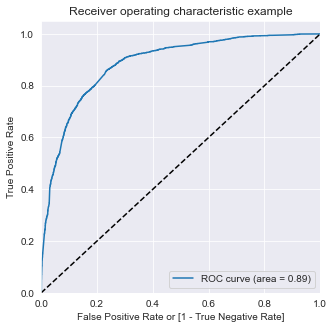

In [117]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted_Prob)

#### Observation:

Area under curve(AUC) is **0.89** which is a very good value.

### Finding the optimal cutoff

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Predicted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6490,0,0.088267,6490,0,1,0,0,0,0,0,0,0,0,0
4026,1,0.336249,4026,0,1,1,1,1,0,0,0,0,0,0
6453,1,0.588456,6453,1,1,1,1,1,1,1,0,0,0,0
8949,1,0.145280,8949,0,1,1,0,0,0,0,0,0,0,0
6467,0,0.396289,6467,0,1,1,1,1,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386956  1.000000  0.000000
0.1   0.1  0.585427  0.979435  0.336727
0.2   0.2  0.762834  0.918952  0.664291
0.3   0.3  0.792323  0.878629  0.737847
0.4   0.4  0.813856  0.768145  0.842708
0.5   0.5  0.814324  0.702016  0.885213
0.6   0.6  0.803401  0.627823  0.914228
0.7   0.7  0.777812  0.512500  0.945279
0.8   0.8  0.755812  0.422581  0.966149
0.9   0.9  0.703698  0.257258  0.985492


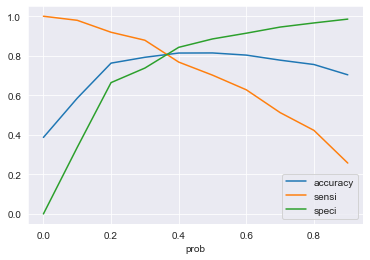

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

###### Observation:

The cutoff is around **0.35**


In [121]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Predicted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head(20)

,Converted,Predicted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6490,0,0.088267,6490,0,1,0,0,0,0,0,0,0,0,0,0
4026,1,0.336249,4026,0,1,1,1,1,0,0,0,0,0,0,0
6453,1,0.588456,6453,1,1,1,1,1,1,1,0,0,0,0,1
8949,1,0.145280,8949,0,1,1,0,0,0,0,0,0,0,0,0
6467,0,0.396289,6467,0,1,1,1,1,0,0,0,0,0,0,1
3481,0,0.012145,3481,0,1,0,0,0,0,0,0,0,0,0,0
2209,0,0.630539,2209,1,1,1,1,1,1,1,1,0,0,0,1
1608,0,0.532095,1608,1,1,1,1,1,1,1,0,0,0,0,1
2969,0,0.030921,2969,0,1,0,0,0,0,0,0,0,0,0,0
8560,0,0.197995,8560,0,1,1,0,0,0,0,0,0,0,0,0


In [122]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Predicted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Predicted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
6490,0,0.088267,6490,0,1,0,0,0,0,0,0,0,0,0,0,9
4026,1,0.336249,4026,0,1,1,1,1,0,0,0,0,0,0,0,34
6453,1,0.588456,6453,1,1,1,1,1,1,1,0,0,0,0,1,59
8949,1,0.145280,8949,0,1,1,0,0,0,0,0,0,0,0,0,15
6467,0,0.396289,6467,0,1,1,1,1,0,0,0,0,0,0,1,40


### Comment:
Checking if **80%** cases are correctly predicted based on the converted column.

In [123]:
# Get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1988
0     492
Name: final_predicted, dtype: int64

In [124]:
# check the precentage of final_predicted conversions

1988/float(1988+492)

0.8016129032258065

##### Comment:

Hence we can see that the **final prediction** of conversions have a target of **80% (80.3%)** conversion as per the X Educations CEO's requirement . Hence this is a good model.

#### Model evaluation - metrics

In [125]:
#confusion matrix
confusion_upd = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[3478  451]
 [ 739 1741]]


In [126]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8143236074270557


In [127]:
TP = confusion_upd[1,1] # true positive 
TN = confusion_upd[0,0] # true negatives
FP = confusion_upd[0,1] # false positives
FN = confusion_upd[1,0] # false negatives
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Sensitivity -  0.802
Specificity -  0.809
False Positive Rate -  0.191
Positive Predicted Value -  0.726
Negative Predicted Value -  0.866


#### Precision and Recall

In [128]:
print("Precision Score - ",round(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted),3))
print("Recall Score - ", round(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted),3))

Precision Score -  0.794
Recall Score -  0.702


In [129]:
### Precision and Recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Predicted_Prob)

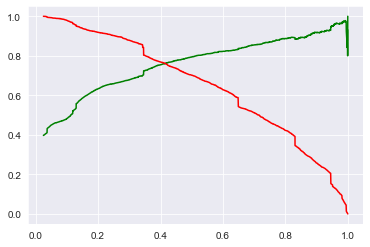

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11:- Making predictions on the test data set

In [131]:
#scaling the columns
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [132]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,TotalVisits,LastAct_Email Bounced,LastAct_Had a Phone Conversation,LastAct_Olark Chat Conversation,LastAct_SMS Sent,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7359,0.167116,0.176471,0,0,0,1,0,0,0,1,0
2201,0.057951,0.294118,0,0,1,0,0,0,0,1,0
2473,0.582210,0.529412,0,0,0,1,0,0,0,0,1
8388,0.057053,0.058824,0,0,0,0,0,0,0,1,0
2949,0.097484,0.235294,0,0,0,0,0,0,0,1,0


In [133]:
X_test_sm = sm.add_constant(X_test)

In [134]:
#making prediction
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
7359,0.435060
2201,0.036841
2473,0.987379
8388,0.105457
2949,0.145025


In [136]:
# manke index as the lead id
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadId'] = y_test_df.index
y_test_df.head()

,Converted,LeadId
7359,0,7359
2201,0,2201
2473,1,2473
8388,0,8388
2949,0,2949


In [137]:
# Removing index for both dataframes to append them side by side 

y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# creating the final test predicted dataframe
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)
y_test_pred_final.head()

,Converted,LeadId,0
0,0,7359,0.435060
1,0,2201,0.036841
2,1,2473,0.987379
3,0,8388,0.105457
4,0,2949,0.145025


In [139]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Predicted_Prob'})

In [140]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [141]:
# Now let us calculate the lead score

y_test_pred_final['lead_score'] = y_test_pred_final.Predicted_Prob.map(lambda x: round(x*100))
y_test_pred_final.head()

,Converted,LeadId,Predicted_Prob,final_predicted,lead_score
0,0,7359,0.435060,1,44
1,0,2201,0.036841,0,4
2,1,2473,0.987379,1,99
3,0,8388,0.105457,0,11
4,0,2949,0.145025,0,15


###### Next step:
Checking if 80% cases are correctly predicted based on the converted column.

In [142]:
# Get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_test_pred_final.loc[y_test_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    817
0    228
Name: final_predicted, dtype: int64

In [143]:
# check the precentage of final_predicted conversions on test data

817/float(817+228)

0.7818181818181819

### Comment:

We are able to predict almost **80%** of the outcome correctly

### Step 12: Evaluation of the predicted test data

In [144]:
# accuracy
print("Accuracy - ", round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted),2))

Accuracy -  0.8


In [145]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion

array([[1368,  335],
       [ 228,  817]], dtype=int64)

#### Checking other metrices i.e. Sensitivity, Specificity, FPR, Positive Predicted Value and Negative Predicted Value

In [146]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity - ", round(TP/(TP+FN),3))
print("Specificity - ", round(TN/(TN+FP),3))
print("False Positive Rate - ", round(FP/(TN+FP),3))
print("Positive Predicted Value - ", round(TP/(TP+FP),3))
print("Negative Predicted Value - ", round(TN/(TN+FN),3))

Sensitivity -  0.782
Specificity -  0.803
False Positive Rate -  0.197
Positive Predicted Value -  0.709
Negative Predicted Value -  0.857


#### Precision and Recall

In [147]:
print("Precision Score - ",round(precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted),3))
print("Recall Score - ", round(recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted),3))

Precision Score -  0.709
Recall Score -  0.782


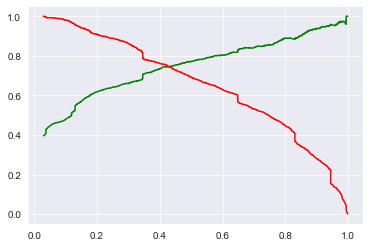

In [148]:
# Precision and Recall tradeoff
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Predicted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 13 :  Conclusion

- The **top 5 variables** which will help to increase the conversion rate are
     1. Total Time Spent on Website
     2. LeadOrigin_Lead Add Form
     3. Occupation_Working Professional
     4. LeadSource_Olark Chat
     5. LastAct_Had a Phone Conversation
     6. LastAct_SMS Sent <br>
     
  
- The final predicted conversion on train/test data is around 80%
- Lead ID's(Clients) who have probability more than 0.35( Lead Score > 35 i.e, 0.35 * 100) can be considered as **HOT LEADS**
 